# Gradient Descent

In this class we will code one of the oldest (and most efficient!) optimization methods (Cauchy, Augustin (1847). _Méthode générale pour la résolution des systèmes d'équations simultanées_).

## The intuition

go in the direction of steepest descent

<img style="margin-left:0" width="300px" src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" />

## More formally

We want to minimize a function $f: \mathbb{R}^p \to \mathbb{R}$ which is differentiable. Then we construct a sequence $x^1, x^2 , \ldots$ by the recusive formula

$$x^{k+1} = x^k - \gamma \nabla f(x^k) \quad$$

where $\gamma$ is the step-size. 

## Step size

* How to choose the step size?

The theory says that the optimum is given by $\frac{1}{L}$, where $L$ is the Lipschitz constant of the gradient of $f$.

## Gradient descent for least squares

We will now code a gradient descent scheme. The first thing is to define what is the loss that we want to optimize. We will start with a least squares loss:

$$f(x) = \frac{1}{2}\|b - Ax\|^2$$
for some given matrices $A$ and vector $b$.

In [1]:
import numpy as np
np.random.seed(0)

n_samples, n_features = 10, 5
A = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = A.dot(w) + np.random.randn(n_samples)


In [2]:
A

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028]])

In [4]:
b.shape

(10,)

In [7]:
b - A.dot(w)

array([ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614])

In [8]:

def func(x):
    return 0.5 * np.sum((b - np.dot(A, x)) ** 2)

def grad(x):
    return - A.T.dot(b - np.dot(A, x))

In [9]:
func(np.array([0, 1, 2, 3, 4]))

403.68145991617422

In [10]:
# Implemented algorithm:

max_iter = 100
# Lipschitz constant
L = np.linalg.norm(A.T.dot(A))
step_size = 1. / L
# initial guess
xk = np.zeros(n_features)
for i in range(max_iter):
    xk = xk - step_size * grad(xk)

## Visualize convergence

Once we started the algorithm. How to know if its working properly?

In [16]:
# imports matplotlib, a plotting library
%pylab inline

cost_history = []
grad_history = []
xk = np.zeros(n_features)
for i in range(max_iter):
    xk = xk - step_size * grad(xk)
    cost_history.append(func(xk)) # .. insert this line to keep track of iterates ..
    grad_history.append(np.linalg.norm(grad(xk)))

Populating the interactive namespace from numpy and matplotlib


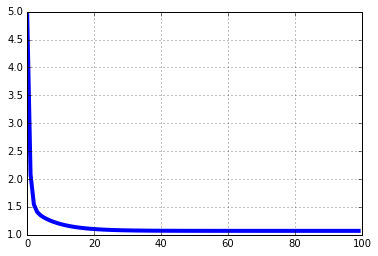

In [17]:
# plot the cost
plt.plot(cost_history, lw=4)
plt.grid()
plt.show()

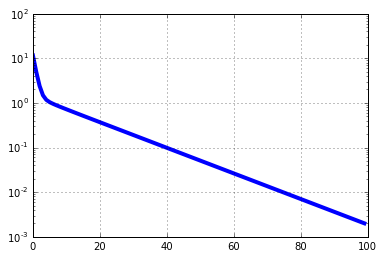

In [19]:
plt.plot(grad_history, lw=4)
plt.grid()
plt.yscale('log')
plt.show()

### Exercise (20 min): 

Use the gradient descent algorithm to solve a logistic regression problem. The data is given below. You will need to:

 * Define the function
 * Define the gradient
 * Compute the step size
 * Perform gradient descent

In [20]:
import numpy as np
np.random.seed(0)

n_samples, n_features = 10, 5
A = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = np.sign(A.dot(w) + np.random.randn(n_samples))

In [21]:
b

array([-1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.])

In [66]:
def loss_logistic(x):
    p = b * A.dot(x)
    return -np.sum(np.log(1.0 / (1.0 + np.exp(-p))))

In [67]:
x0 = np.zeros(n_features)
loss_logistic(x0)

6.9314718055994531

In [68]:
def phi(t):
    return  1. / (1 + np.exp(-t))

def grad(x):
    z = phi(b * A.dot(x))
    z0 = (z - 1) * b
    grad_w = A.T.dot(z0) 
    return grad_w


In [69]:

cost_history = []
grad_history = []
xk = np.zeros(n_features)
for i in range(max_iter):
    xk = xk - 4 * step_size * grad(xk)
    cost_history.append(loss_logistic(xk)) # .. insert this line to keep track of iterates ..
    grad_history.append(np.linalg.norm(grad(xk)))

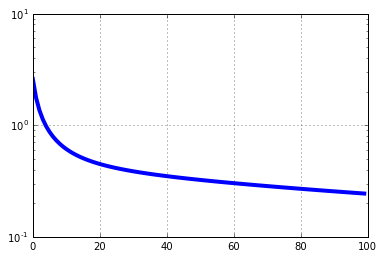

In [70]:
plt.plot(grad_history, lw=4)
plt.grid()
plt.yscale('log')
plt.show()